<a href="https://colab.research.google.com/github/RajnishGautam/Rajnish/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
CODSOFT INTERNSHIP

TASK 4 : Sales prediction using pythoon

AUTHOR : RAJNISH KUMAR

DOMAIN : DATA SCIENCE

PROBLEM STATEMENT : Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors
such asadvertising expenditure, target audience segmentation, andadvertising platform selection.
In businesses that offer products or services, the role of a DataScientist is crucial for predicting future sales. They utilize machine learning techniques
in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

In [ ]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


In [ ]:
#Reading csv files
df=pd.read_csv("/content/advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.shape


(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe(include='all')


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)


<Axes: >

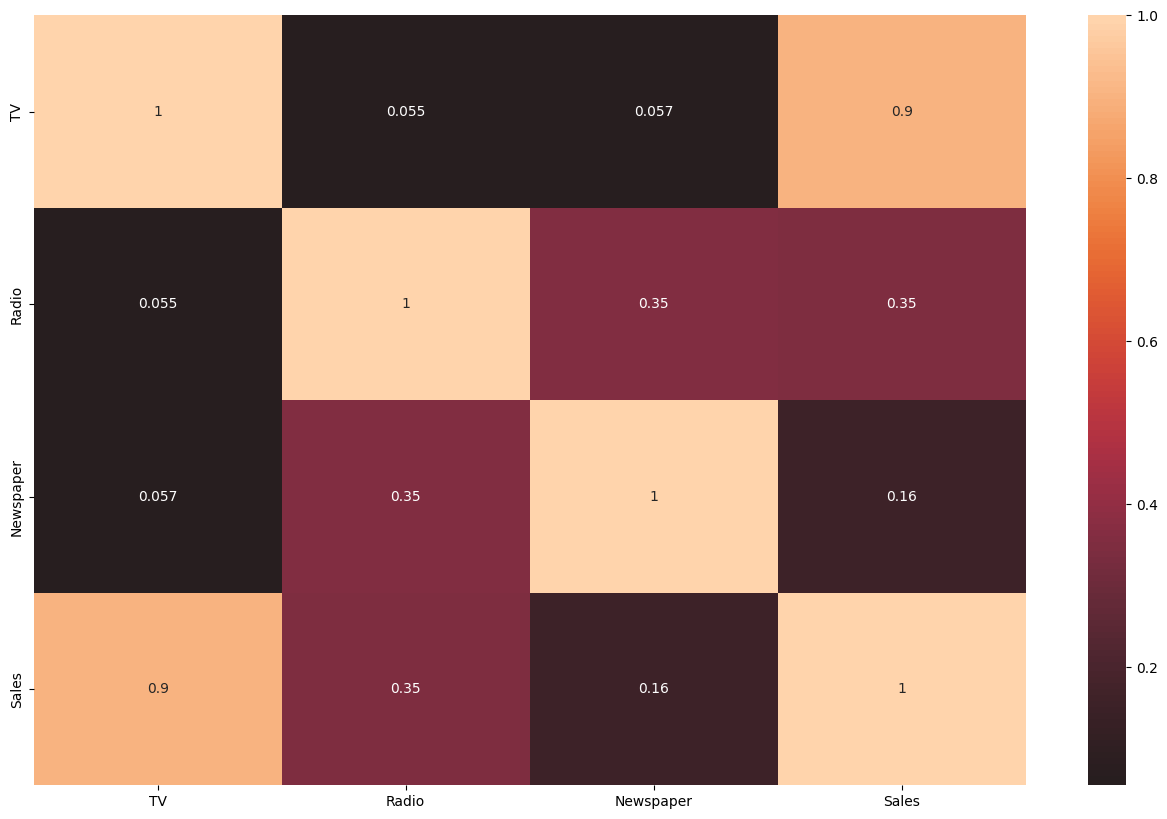

In [ ]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True,center=0 )

In [ ]:
dic = {}

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

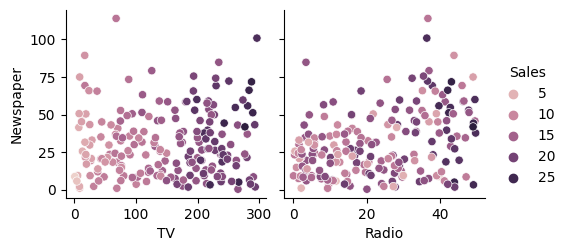

In [ ]:
sns.pairplot(df, x_vars=['TV','Radio',],y_vars ='Newspaper',hue = 'Sales')

<Axes: xlabel='Radio', ylabel='Newspaper'>

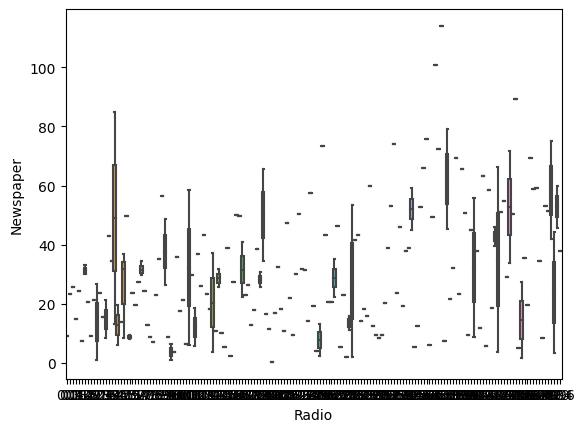

In [ ]:
sns.boxplot(x="Radio", y="Newspaper", data=df)

<Axes: xlabel='TV', ylabel='Newspaper'>

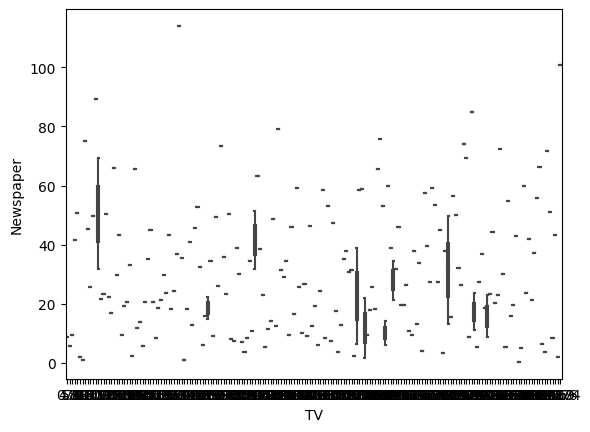

In [ ]:
sns.boxplot(x="TV", y="Newspaper", data=df)

<Axes: xlabel='TV', ylabel='Sales'>

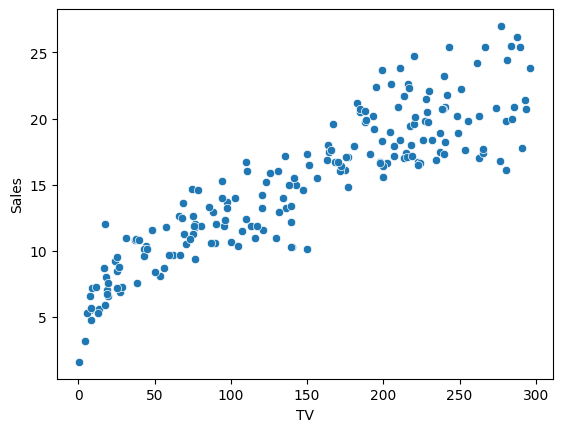

In [ ]:
sns.scatterplot(x="TV", y="Sales", data=df)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

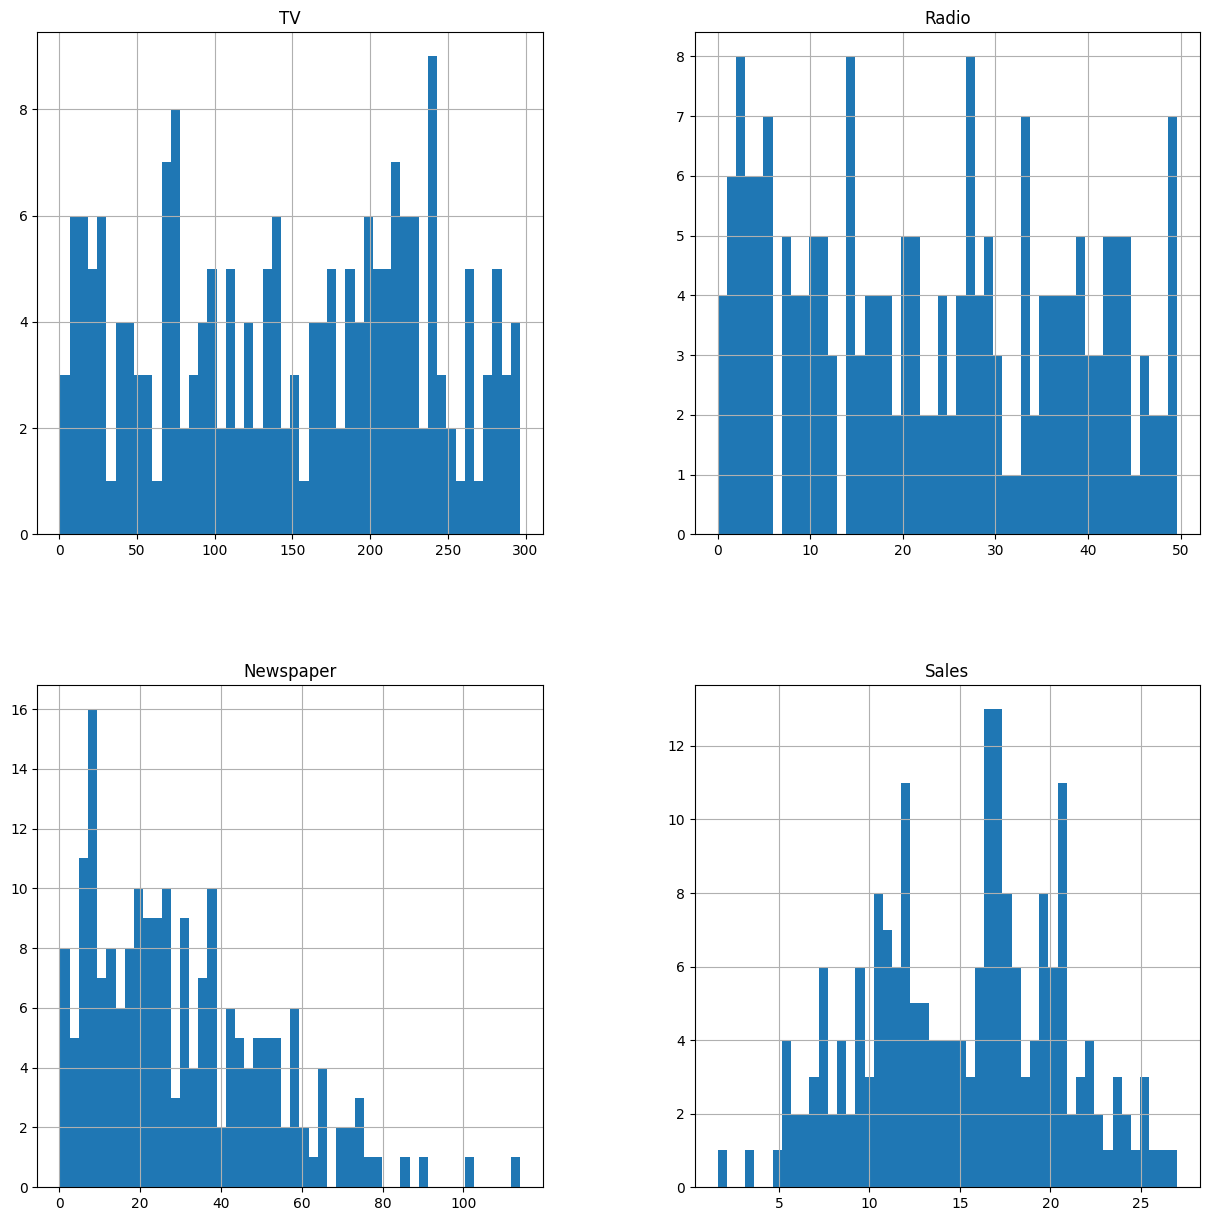

In [ ]:
df.hist(bins=50, figsize=(15, 15))

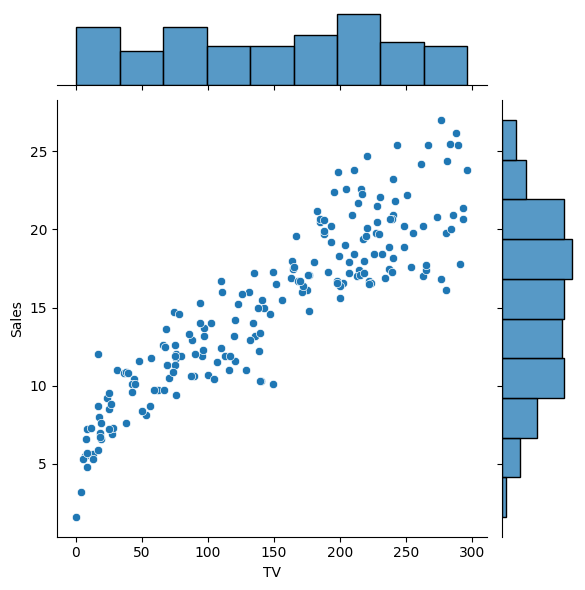

In [ ]:
sns.jointplot(x ='TV', y ='Sales', data = df)


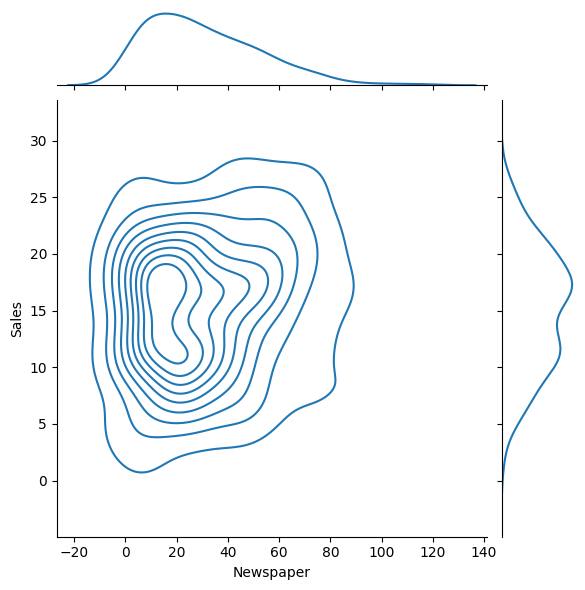

In [ ]:
sns.jointplot(x ='Newspaper', y ='Sales', data = df, kind ='kde')
# KDE shows the density where the points match up the most


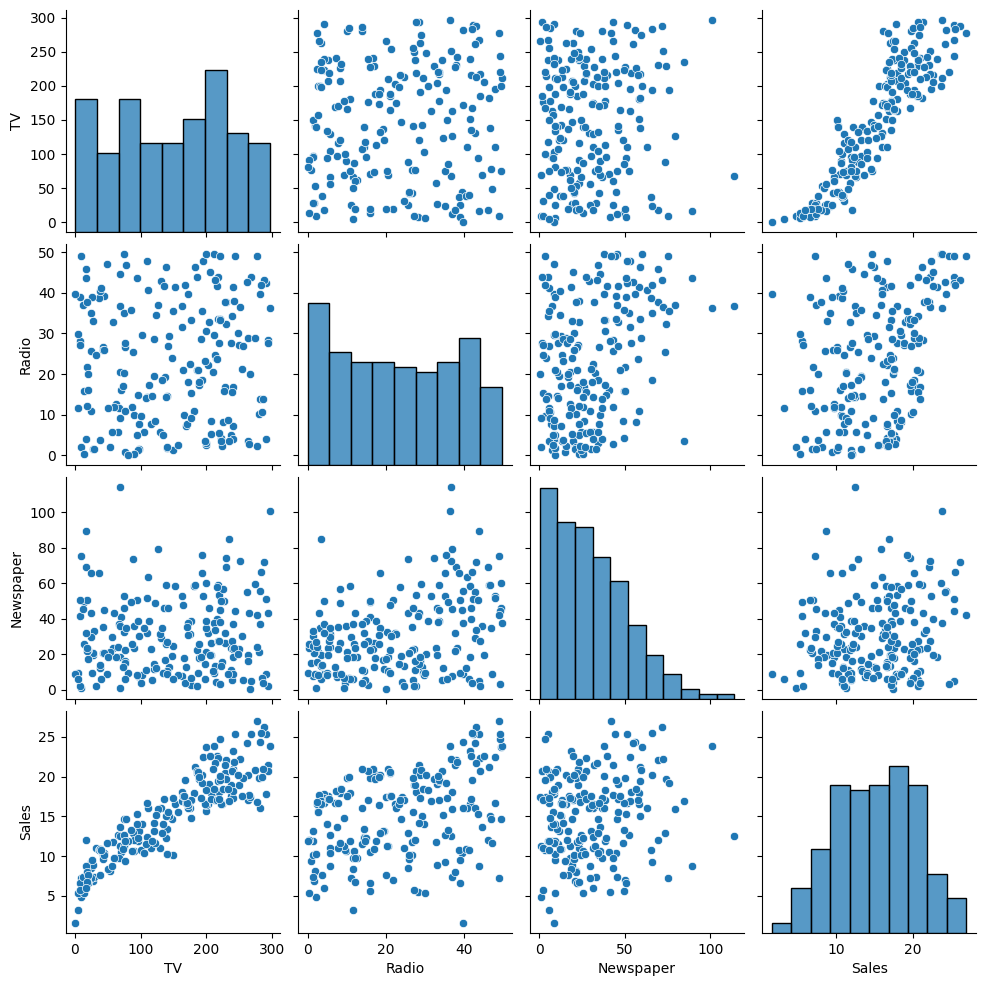

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.pairplot(df)
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
x=df.iloc[:,0:-1]

In [ ]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
#Train Test Splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [ ]:
x_train

,TV,Radio,Newspaper
113,209.6,20.6,10.7
115,75.1,35.0,52.7
188,286.0,13.9,3.7
31,112.9,17.4,38.6
158,11.7,36.9,45.2
...,...,...,...
192,17.2,4.1,31.6
191,75.5,10.8,6.0
33,265.6,20.0,0.3
183,287.6,43.0,71.8


In [ ]:
x_test

,TV,Radio,Newspaper
136,25.6,39.0,9.3
133,219.8,33.5,45.1
130,0.7,39.6,8.7
142,220.5,33.2,37.9
154,187.8,21.1,9.5
164,117.2,14.7,5.4
96,197.6,3.5,5.9
77,120.5,28.5,14.2
3,151.5,41.3,58.5
49,66.9,11.7,36.8


In [ ]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [ ]:
#APPLYING LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_scaled)

In [ ]:
#EVALUATE THE PERFORMANCE OF A LINEAR REGRESSION MODEL
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8102817515934881

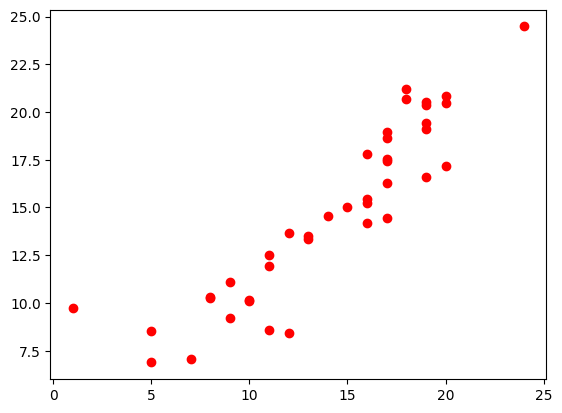

In [ ]:
#ANALYZING DATA BY SCATTER PLOT
plt.scatter(y_test,y_pred,c='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a297b71d9c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a297b71ff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a297b71cd00>],
 'medians': [<matplotlib.lines.Line2D at 0x7a297ff2c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a297ff2c6d0>],
 'means': []}

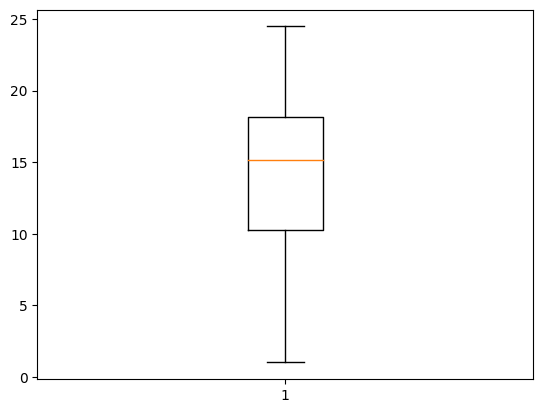

In [ ]:
#ANALYZING DATA BY BOX PLOT
y_all = np.concatenate((y_test, y_pred))
plt.boxplot(y_all)